## Observations and Insights

## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [15]:
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
clean_study_data_complete.groupby('Drug Regimen').mean()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177
Propriva,17.060811,52.320930,1.013514,10.006757,27.135135
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354


In [10]:
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
means = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

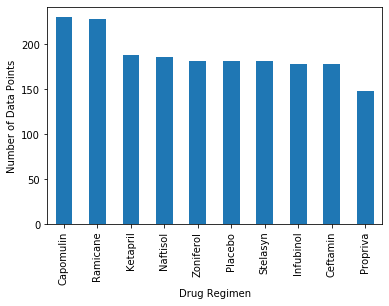

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = clean_study_data_complete['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

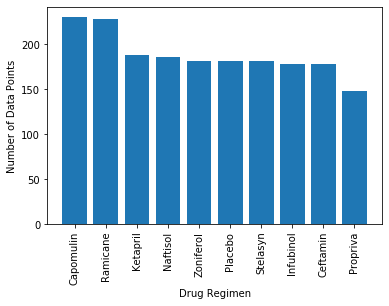

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = clean_study_data_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

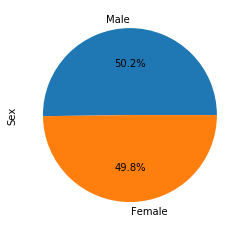

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

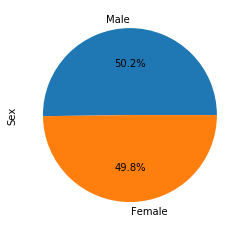

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


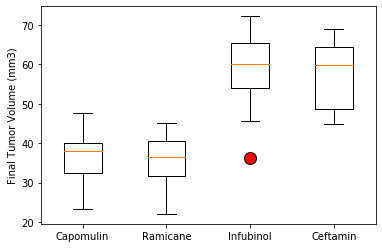

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(clean_study_data_complete,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

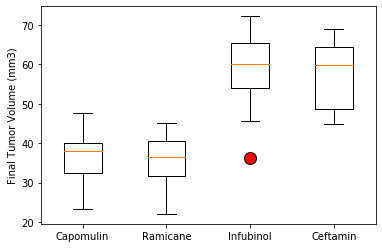

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

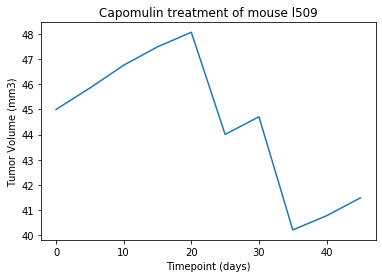

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

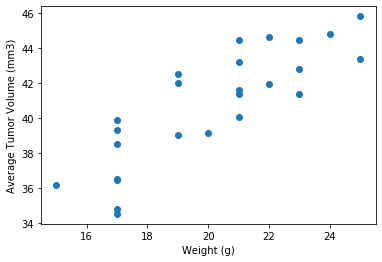

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

The correlation between mouse weight and the average tumor volume is 0.84


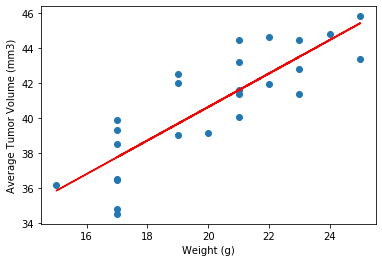

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen